In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv('/Users/vaishakhmenon/Downloads/IIMK_DSAI_W14_Graded Assignment 14.1_Data Set - credit_card_defaulter.csv')

# Display rows
df.head()


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


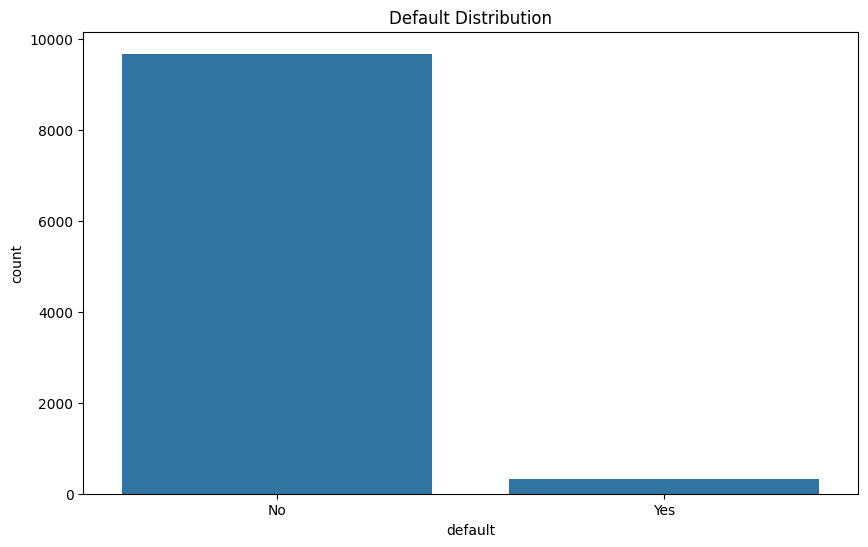

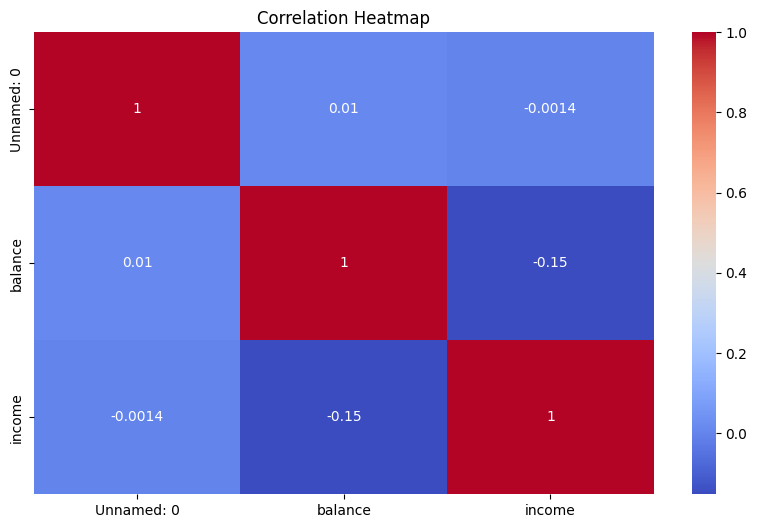

Missing values in each column:
 Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64
Target variable distribution in the whole dataset:
 default
0    9667
1     333
Name: count, dtype: int64
Target variable distribution in the training set:
 default
0    6767
1     233
Name: count, dtype: int64
Target variable distribution in the test set:
 default
0    2900
1     100
Name: count, dtype: int64
Shape of X_train: (7000, 3)
Shape of X_test: (3000, 3)
Shape of y_train: (7000,)
Shape of y_test: (3000,)


In [21]:
# Plot count plot for variable
plt.figure(figsize=(10, 6))
sns.countplot(x='default', data=df)
plt.title('Default Distribution')
plt.show()

# Plotting a heatmap for correlation
# Selecting numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Prepare data for model building
# Converting variable to numeric
df['default'] = df['default'].apply(lambda x: 1 if x == 'Yes' else 0)
df['student'] = df['student'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features
X = df.drop(['Unnamed: 0', 'default'], axis=1)
y = df['default']

# Check distribution of target variable
print("Target variable distribution in the whole dataset:\n", y.value_counts())

# Split data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check distribution - target variable in train, test sets
print("Target variable distribution in the training set:\n", y_train.value_counts())
print("Target variable distribution in the test set:\n", y_test.value_counts())

# Execute scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


In [22]:
# Build Train Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Print model summary
print("Random Forest Model Summary:")
print(rf_model)


Random Forest Model Summary:
RandomForestClassifier(random_state=42)


In [23]:
# build train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Print model summary
print("XGBoost Model Summary:")
print(xgb_model)


XGBoost Model Summary:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


Random Forest Model Performance:
Accuracy: 0.9676666666666667
Confusion Matrix:
 [[2870   30]
 [  67   33]]
F1 Score: 0.4049079754601227
ROC AUC Score: 0.8935568965517242


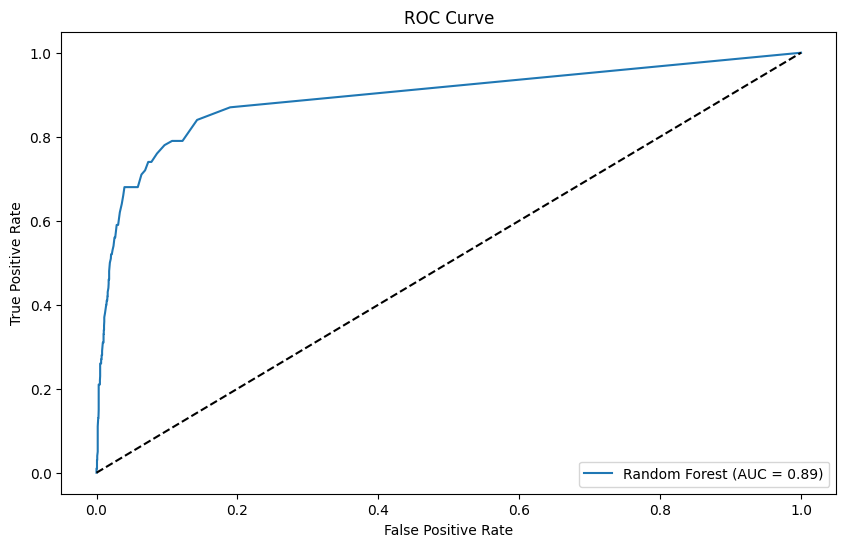

XGBoost Model Performance:
Accuracy: 0.9676666666666667
Confusion Matrix:
 [[2871   29]
 [  68   32]]
F1 Score: 0.39751552795031053
ROC AUC Score: 0.9363034482758621


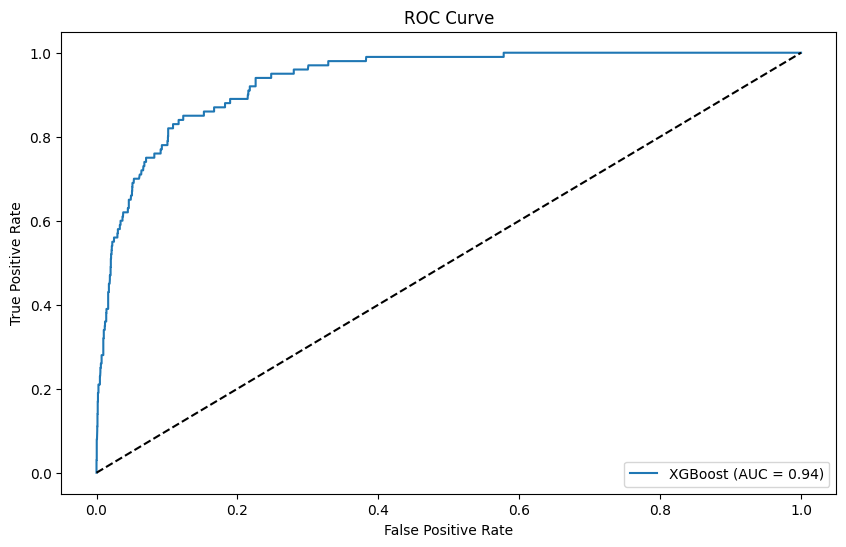

Comparison of Model Performance:
Random Forest Accuracy: 0.9676666666666667
XGBoost Accuracy: 0.9676666666666667
Random Forest F1 Score: 0.4049079754601227
XGBoost F1 Score: 0.39751552795031053
Random Forest ROC AUC: 0.8935568965517242
XGBoost ROC AUC: 0.9363034482758621


In [24]:
# function to calculate metrics
def safe_evaluation(y_true, y_pred, y_proba=None):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])
    f1 = f1_score(y_true, y_pred, zero_division=1)
    if y_proba is not None and len(np.unique(y_true)) > 1:
        roc_auc = roc_auc_score(y_true, y_proba)
        fpr, tpr, _ = roc_curve(y_true, y_proba)
    else:
        roc_auc = "undefined"
        fpr, tpr = None, None
    return accuracy, conf_matrix, f1, roc_auc, fpr, tpr

# Evaluate Forest Model
rf_predictions = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_accuracy, rf_conf_matrix, rf_f1, rf_roc_auc, rf_fpr, rf_tpr = safe_evaluation(y_test, rf_predictions, rf_proba)

print("Random Forest Model Performance:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

# Plot ROC Curve 
if rf_roc_auc != "undefined":
    plt.figure(figsize=(10, 6))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate XGBoost Model
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_accuracy, xgb_conf_matrix, xgb_f1, xgb_roc_auc, xgb_fpr, xgb_tpr = safe_evaluation(y_test, xgb_predictions, xgb_proba)

print("XGBoost Model Performance:")
print("Accuracy:", xgb_accuracy)
print("Confusion Matrix:\n", xgb_conf_matrix)
print("F1 Score:", xgb_f1)
print("ROC AUC Score:", xgb_roc_auc)

# Plot ROC Curve - XGBoost 
if xgb_roc_auc != "undefined":
    plt.figure(figsize=(10, 6))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Compare performance
print("Comparison of Model Performance:")
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Random Forest F1 Score:", rf_f1)
print("XGBoost F1 Score:", xgb_f1)
print("Random Forest ROC AUC:", rf_roc_auc)
print("XGBoost ROC AUC:", xgb_roc_auc)


In [ ]:
#Both Random Forest and XGBoost models show the same high accuracy of 96.77% - they correctly predict the same number of cases.
#Random Forest model has a slightly higher F1 score (0.405 . 0.398), indicating a bit better balance between precision and recall.